# mnist tile

In [32]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import random
import numpy as np
import os, sys
from PIL import Image
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [33]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
tf.keras.backend.set_session(tf.Session(config=config))

In [34]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [81]:
def create_tile(train_x, train_y, num_sqrt=4, avoid_nums=[]):
    shape = train_x[0].shape
    agg_indexs = [ np.where(train_y==val)[0].tolist() for val in range(10) if not val in avoid_nums ]
    ext_indexs = [ random.choice(agg_indexs[i%len(agg_indexs)]) for i in range(num_sqrt*num_sqrt) ]
    img = np.zeros((num_sqrt*shape[0], num_sqrt*shape[1]))
    random.shuffle(ext_indexs)
    for i, ind in enumerate(ext_indexs):
        x_i = i%num_sqrt
        y_i = i//num_sqrt
        #print(x_i, y_i, train_y[ind])
        img[ y_i*shape[0]:(y_i+1)*shape[0], x_i*shape[1]:(x_i+1)*shape[1] ] = train_x[ind]
    return img

In [135]:
def create_batch_tile(train_x, train_y, batch_size=16, num_sqrt=4, avoid_nums=[]):
    base = np.empty((0,)+train_x[0].shape)
    imgs = [ np.array([create_tile(train_x, train_y, num_sqrt=num_sqrt, avoid_nums=avoid_nums)]) for _ in range(batch_size) ]
    base = np.vstack(imgs)
    base = base.reshape((batch_size,)+imgs[0].shape[1:3]+(1,) )
    return base

# Test of create_tile

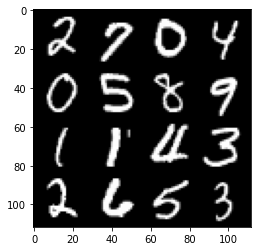

In [116]:
img = create_tile(train_x, train_y, avoid_nums=[])
plt.imshow(img, cmap='gray')

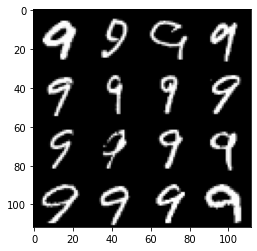

In [144]:
img = create_tile(train_x, train_y, avoid_nums=[0,1,2,3,4,5,6,7,8])
plt.imshow(img, cmap='gray')

# Test of create_batch_tile

(16, 112, 112, 1)


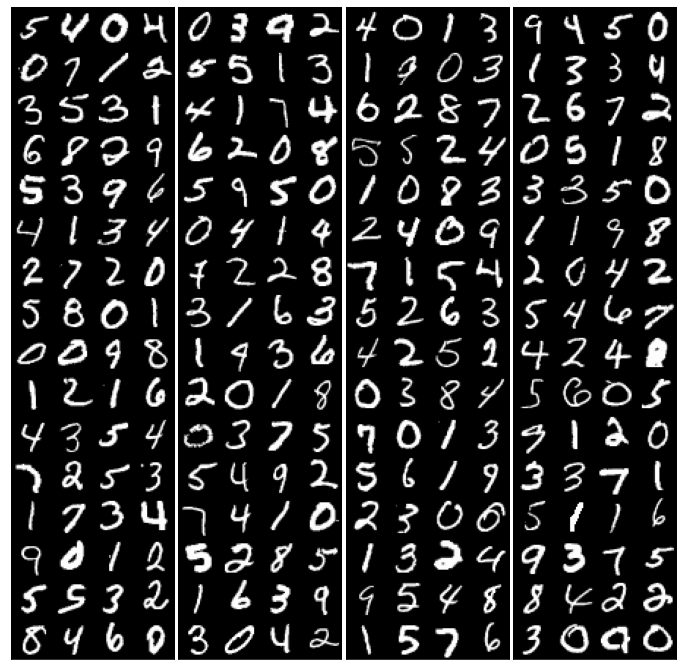

In [147]:
batch_size = 16
batch_img = create_batch_tile(train_x, train_y, num_sqrt=4, batch_size=batch_size)
print(batch_img.shape)

pm=4
fig, ax = plt.subplots(pm, pm, figsize=(12, 12))
fig.subplots_adjust(hspace=0, wspace=0)

for i in range(batch_size):
        ax[i%pm, i//pm].xaxis.set_major_locator(plt.NullLocator())
        ax[i%pm, i//pm].yaxis.set_major_locator(plt.NullLocator())
        ax[i%pm, i//pm].imshow(batch_img[i,:,:,0], cmap="gray")